#The Normal Equation to minimize cost function
## y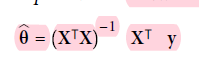


## Data Description: 
Here we created an array of 100 randomnumbers, then created a different array by applying some linear transformation on X, and saved it in Y

Now our objective is to discern best factors for theta using the normal equation so that y could be predicted from X

Text(0, 0.5, 'y')

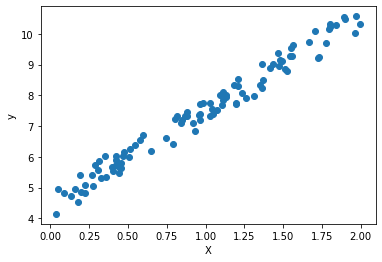

In [5]:
import numpy as np
import matplotlib.pyplot as plt


X=2*np.random.rand(100,1)
np.shape(X)
y = 4 + 3*X + np.random.rand(100,1)
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

## Now let’s compute θ using the Normal Equation. We will use the inv() function from

##NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and

##the dot() method for matrix multiplication:

Here we added 1 so as to make the bvias be computed when using dot product of X with theta_best, for the best predictions be made.

In [7]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.47828956],
       [3.05598682]])

In [9]:
X_b

array([[1.        , 0.20063544],
       [1.        , 0.4201514 ],
       [1.        , 1.49229149],
       [1.        , 0.74543076],
       [1.        , 1.80135146],
       [1.        , 1.43270134],
       [1.        , 1.797021  ],
       [1.        , 0.44253552],
       [1.        , 1.66837468],
       [1.        , 1.36158655],
       [1.        , 0.54694173],
       [1.        , 0.98083553],
       [1.        , 0.13223233],
       [1.        , 0.96252195],
       [1.        , 1.79906719],
       [1.        , 0.15764533],
       [1.        , 1.70652904],
       [1.        , 1.25978051],
       [1.        , 0.1882061 ],
       [1.        , 1.07512862],
       [1.        , 0.88007002],
       [1.        , 0.26689531],
       [1.        , 1.19634568],
       [1.        , 1.77895043],
       [1.        , 0.35283811],
       [1.        , 0.42110428],
       [1.        , 1.56299833],
       [1.        , 0.84348341],
       [1.        , 1.9649458 ],
       [1.        , 1.52328646],
       [1.

# Making predictions using the calculated theta_best

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.47828956],
       [10.59026321]])

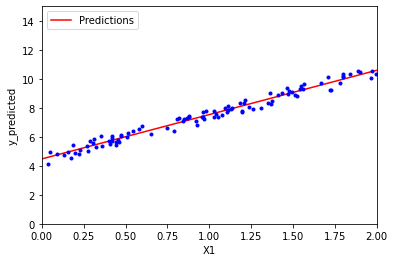

In [21]:
plt.plot(X_new, y_predict, "r-",label="Predictions")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.legend(loc="upper left")
plt.xlabel('X1')
plt.ylabel('y_predicted')
plt.show()

#Applying linear Regression from scipy

The LinearRegression class is based on the scipy.linalg.lstsq() function

This function computes θ = X+.y, where X+ is the pseudoinverse of X (specifically,
the Moore-Penrose inverse). 
We can use np.linalg.pinv() to compute the
pseudoinverse directly:

It is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix X⊺X is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.47828956]), array([[3.05598682]]))

In [24]:
np.linalg.pinv(X_b).dot(y)

array([[4.47828956],
       [3.05598682]])

Both SVD (Singular vector decomposition)(big_O(n^2)) and Normal Equation(big_O(n^2.4)) get slow when feature size increases (100,000).

But both are linear with the instance size i.e, big_O(m)

Making oredictions is also a big_O(n) operation. Linear with no. of instances and features.

# Gradient Descent:

To overcome this duress of complexity of big_O(n^2) on no. of features, we seek another approach known as Gradient Descent.
By tweaking parameters iteratively in oreder to optimize.

It measures the local gradient of the error function with
regard to the parameter vector θ, and it goes in the direction of descending gradient.
Once the gradient is zero, you have reached a minimum!

size of the steps:

determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge.

On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before



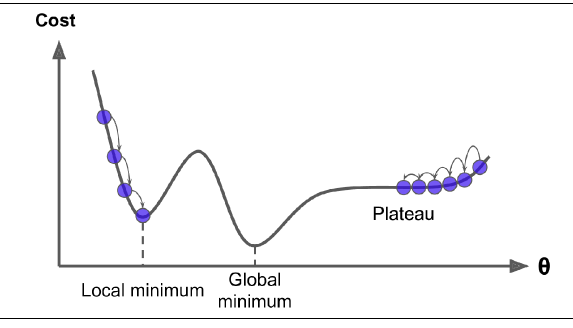

Here the choice of _random_intialization_parameter_ would give differen local minimas.

MSE min sq error, method has got just one Global minima.

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge

## Batch Gradient Descent

Compute the gradient of the cost function
with regard to each model parameter θj.

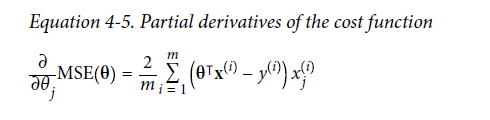

## Some Caveats!! :
Though GD is faster than SVD and Normal equation methods in term of scaling with no. of features in the data,
But the naive approach of it requires the GD to calculate Gradients at every step using the whole training set, which makes it awfully slow in naive form.

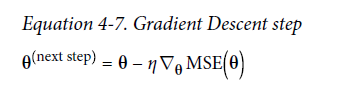

### Implementation

In [25]:
eta = 0.1 #learning Rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1) #random intialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

In [26]:
theta

array([[4.3587451 ],
       [3.16170188]])

# Stochastic Gradient Descent

Stochastic Gradient Descent picks a
random instance in the training set at every step and computes the gradients based
only on that single instance.

Outof the core algorithm: 
It also makes it possible to train on huge training sets, since only one instance
needs to be in memory at each iteration

cost function will bounce up and down, decreasing only on average.

SGD has a better chance of finding global minima than batch GD, as the former is randomly skipping the instances.

Imborgilio:

Therefore, randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum.

## Implementation

In [36]:
X_b[1:3]

array([[1.        , 0.4201514 ],
       [1.        , 1.49229149]])

In [34]:
X_b[1]

array([1.       , 0.4201514])

In [32]:
X_b[:]

array([[1.        , 0.20063544],
       [1.        , 0.4201514 ],
       [1.        , 1.49229149],
       [1.        , 0.74543076],
       [1.        , 1.80135146],
       [1.        , 1.43270134],
       [1.        , 1.797021  ],
       [1.        , 0.44253552],
       [1.        , 1.66837468],
       [1.        , 1.36158655],
       [1.        , 0.54694173],
       [1.        , 0.98083553],
       [1.        , 0.13223233],
       [1.        , 0.96252195],
       [1.        , 1.79906719],
       [1.        , 0.15764533],
       [1.        , 1.70652904],
       [1.        , 1.25978051],
       [1.        , 0.1882061 ],
       [1.        , 1.07512862],
       [1.        , 0.88007002],
       [1.        , 0.26689531],
       [1.        , 1.19634568],
       [1.        , 1.77895043],
       [1.        , 0.35283811],
       [1.        , 0.42110428],
       [1.        , 1.56299833],
       [1.        , 0.84348341],
       [1.        , 1.9649458 ],
       [1.        , 1.52328646],
       [1.

In [28]:
n_epochs = 50
t0, t1 = 5,50 #learning shcedule hyperparameters

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2* xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta -eta*gradients

We iterate by rounds of m iterations; each round is called an epoch.
While the Batch Gradient Descent code iterated 1,000 times through the whole training
set, this code goes through the training set only 50 times and reaches a pretty
good solution:

In [37]:
theta

array([[4.01560257],
       [3.46706112]])

##Caveat!! : 
In SGD independency and identical distribuition of data must be ensured by shuffling, for the case we've a dataset where every thing is labeled acc. to some categories.

#Linear Regression Using SGD

The following code runs for maximum 1,000 epochs or until the loss drops by less
than 0.001 during one epoch (max_iter=1000, tol=1e-3). It starts with a learning rate
of 0.1 (eta0=0.1).

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
y.ravel()

array([ 4.86073539,  5.73475621,  9.1175993 ,  6.62134979, 10.32073146,
        9.00778932, 10.14735004,  5.67727858,  9.72025643,  9.01148754,
        6.39948306,  7.75014194,  4.72752071,  7.39094345, 10.22329091,
        4.93977827, 10.10020576,  7.92717258,  5.41482962,  7.52975541,
        7.44458378,  5.39835023,  7.7210863 ,  9.68880258,  6.03462874,
        5.90080172,  9.63848161,  7.1017003 , 10.02972799,  8.80528644,
        9.21050577,  8.9641773 ,  6.00828795, 10.32853093,  9.27571633,
        7.20341526,  7.33880391,  9.23807815,  8.32373987,  7.72870052,
        7.240446  ,  4.83193432,  7.09695812,  7.31955756,  5.29844614,
        7.34571573,  4.14187622,  7.85992244,  7.97723525,  5.67791847,
       10.5736983 ,  8.88715338,  8.07854786, 10.47540611,  7.95124574,
        6.03424601, 10.53969604,  5.79199224,  5.05131839,  4.8073008 ,
        7.75828581,  6.15064442,  5.34310321,  9.52828481,  6.20517668,
        5.45755244,  9.38516675,  6.2461915 ,  7.2080695 ,  5.09

In [44]:
np.shape(y)

(100, 1)

In [45]:
np.shape(y.ravel())

(100,)

In [47]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.46816994]), array([3.08600597]))

#Mini-batch Gradient Descent
Mini-batch GD
computes the gradients on small random sets of instances called mini-batches. The
main advantage of Mini-batch GD over Stochastic GD is that you can get a performance
boost from hardware optimization of matrix operations, especially when using
GPUs.

Hard to skip loc mininma due to batch like nature.

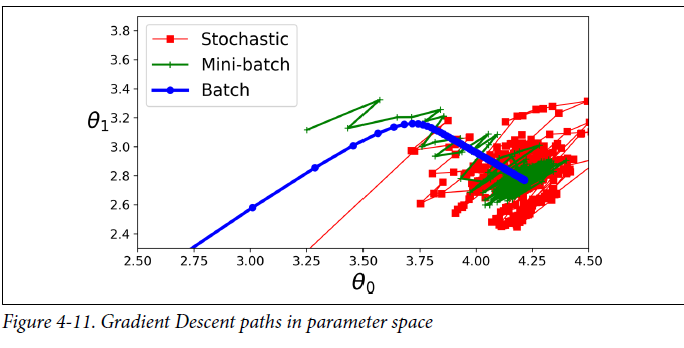

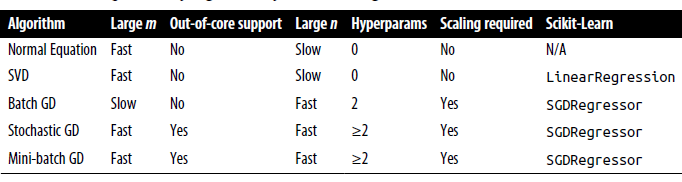

#Connclusion: 
There is almost no difference after training: all these algorithms
end up with very similar models and make predictions in exactly
the same way.